# PCA y UMAP

Cargamos las siguientes librerías:

In [1]:
import random

import umap
import numpy as np
import pandas as pd
import sklearn
from sklearn import cluster        
from sklearn import datasets       
from sklearn import decomposition  

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

En este documento utilizaremos los algoritmos para la reducción de la dimensionalidad PCA y UMAP con el dataset MNIST, compuesto de miles de dígitos manuscritos del 0 al 9. Cada una de las imágenes está formada por 784 píxeles (imágenes de 28 x 28) y , por tado, se parte de un número alto de dimensiones.

In [2]:
X, y = sklearn.datasets.fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

Por lo que cada muestra (las 70k filas del dataset) se componen de 784 dimensiones:

In [3]:
X.shape

(70000, 784)

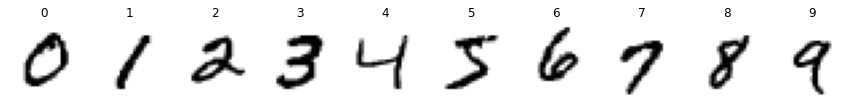

In [4]:
fig, axis = plt.subplots(1, 10, figsize=(12, 6))
for i, ax in enumerate(axis):
    ax.imshow(X[y == str(i)][0].reshape(28, 28), cmap='gray_r')
    ax.set_title(str(i))
    ax.axis('off')
plt.tight_layout()

¿Cuál de los dos algoritmos tendrá una representación más fiel a la distribución original?

<div class="alert alert-block alert-info">
<strong>PCA:</strong>
</div>

Pasaremos directamente a calcular el PCA para dos dimensiones:

In [5]:
pca = decomposition.PCA(n_components=2)
principal_components = pca.fit_transform(X)

Creamos un dataframe con los dos componentes principales y añadimos la etiqueta correspondiente al número al que pertenece cada imagen:

In [6]:
principalDf = pd.DataFrame(data = principal_components, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(data = y, columns = ['target'])], axis = 1)
finalDf.head()

principal component 1  principal component 2 target
0             122.266025            -316.252869      5
1            1010.497944            -289.958793      0
2             -58.997139             393.708207      4
3            -796.963491            -607.442514      1
4            -391.318617             729.814171      9

Para asegurarnos de que no existe ningún valor inesperado en la etiqueta *target*, vemos los valores únicos que tiene.

In [7]:
finalDf['target'].unique()

array(['5', '0', '4', '1', '9', '2', '3', '6', '7', '8'], dtype=object)

Efectivamente están los números de 0 a 9.

Pasamos a ver estas dos dimensiones en un scatter plot.

Antes creamos las variables con las etiquetas y los colores que les asignaremos:

In [8]:
targets = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
colors = ['blue', 'orange', 'red', 'green', 'purple', 'k', 'olive', 'brown', 'cyan', 'pink']

Para la visualización de los componentes obtenidos utilizaremos una función que reutilizaremos con UMAP:

In [9]:
def plot_2d_scatter(df, target, colors):
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 components', fontsize = 20)

    for target, color in zip(targets,colors):
        indicesToKeep = df['target'] == target
        ax.scatter(df.loc[indicesToKeep, 'principal component 1']
                   , df.loc[indicesToKeep, 'principal component 2']
                   , c = color)

    # Añadimos la leyenda que nos permitirá saber a qué número pertenecen los datos
    ax.legend(targets)
    ax.grid()

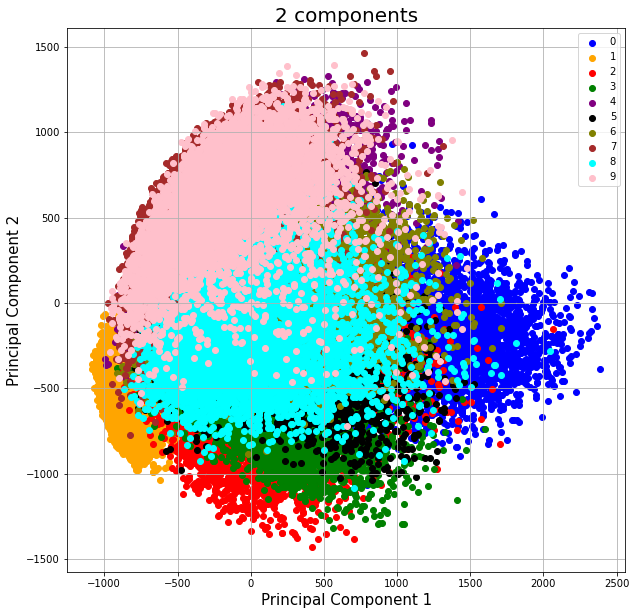

In [10]:
plot_2d_scatter(finalDf, targets, colors)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>
</div>

Viendo la representación gráfica de la proyección en dos dimensiones, podemos ver que algunas clases han quedado más separadas que otras. Por ejemplo tenemos las clases 4 y 9 bastante superpuestas, algo bastante lógico, ya que son dos números que pueden parecerse mucho a la hora de escribirlos. Las otras que han quedado también muy superpuestas son 8, 6 y 5. También por el mismo motivo, son números que pueden parecerse muy dependiendo de cómo se escriban.

Por el contrario tenemos algunos números que están más separados como el 1 o el 2, que pueden presentar menos confusión que el resto.

<div class="alert alert-block alert-info">
Ahora calcularemos el máximo y mínimo de cada una de las dos dimensiones y, para cada una de ellas, generaremos una secuencia de 10 valores con igual separación.</div>

Creamos el máximo y el mínimo de cada componente:

In [11]:
max1 = max(finalDf['principal component 1'])
min1 = min(finalDf['principal component 1'])

max2 = max(finalDf['principal component 2'])
min2 = min(finalDf['principal component 2'])

Calculamos y comprobamos los intervalos creados para cada componente:

In [12]:
interval1 = np.linspace(start=max1, stop=min1, num=10)
interval1

array([ 2383.98016321,  1998.96665496,  1613.95314672,  1228.93963848,
         843.92613024,   458.91262199,    73.89911375,  -311.11439449,
        -696.12790273, -1081.14141098])

In [13]:
interval2 = np.linspace(start=max2, stop=min2, num=10)
interval2

array([ 1464.43392136,  1142.95630935,   821.47869734,   500.00108533,
         178.52347332,  -142.95413869,  -464.4317507 ,  -785.90936271,
       -1107.38697473, -1428.86458674])

<div class="alert alert-block alert-info">
A continuación invertiremos la transformación para cada uno de los 100 puntos y visualizaremos su imagen asociada a una matriz de 10 x 10 imágenes.
</div>

Adaptando el bucle utilizado al inicio crearemos una visualización 10x10 de las imágenes reconstruidas a partir de la combinación de los valores de las dos secuencias que hemos obtenido anteriormente:

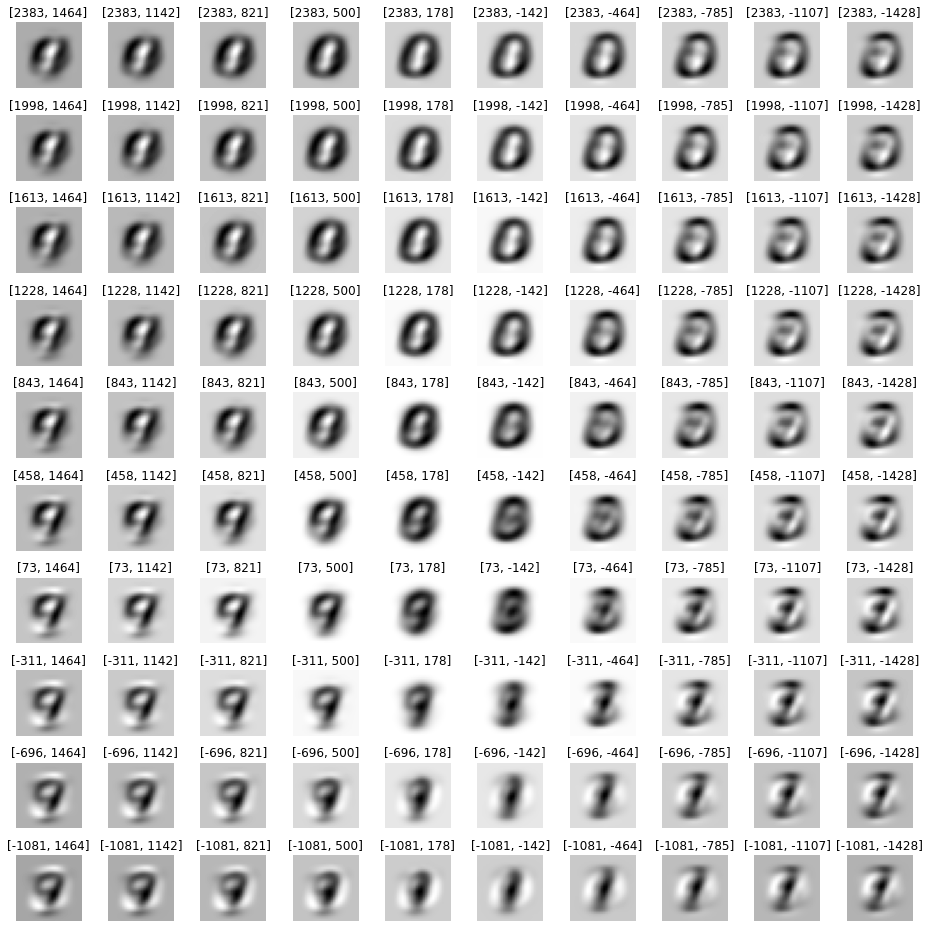

In [14]:
fig, axis = plt.subplots(10, 10, figsize=(13, 13))
for i in range(10):
    for j in range(10):
        image = pca.inverse_transform([interval1[i], interval2[j]])
        axis[i,j].imshow(image.reshape(28, 28), cmap='gray_r')
        # Indicamos en el título los valores de las componentes a las que pertenecela imatge
        axis[i,j].set_title([int(interval1[i]), int(interval2[j])])
        axis[i,j].axis('off')
plt.tight_layout()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>
</div>

En primer lugar, podemos observar que las imágenes no son de una gran calidad. Al realizar PCA y proyectar los datos en dos dimensiones, es posible perder información.

Podemos comprobar la varianza acumulada que nos aporta cada componente con el atributo *explained_variance_ratio_*

In [15]:
pca.explained_variance_ratio_

array([0.09746116, 0.07155445])

Ambas componentes obtenidas nos aportan un total del 16,9% de la varianza. Es posible perder información del conjunto de datos, pero ganamos mucho en reducción de coste computacional. Hemos pasado de 784 a dos dimensiones.

En cuanto a los números que podemos ver tenemos 0, 9, 7 e incluso con los valores [458,-142] podríamos decir que un 8.

Respecto a las transiciones que observamos siguiendo las filas y columnas parecen bastante creíbles. Por ejemplo, en la última fila tenemos las imágenes de un 9 y un 7 al inicio y al final. Parece lógico que estos dos números que pueden parecerse tengan valores similares de sus características. Al variar el segundo componente podemos ver cómo varía del 7 al 9 para el valor -1081 del primer componente.

También ocurre algo similar en la primera columna con el valor de la segunda componente a 1464. Podemos ver cómo la imagen va del 0 al 9 a medida que varía la primera componente. Bastante razonable porque son dos números que también pueden parecerse.

<div class="alert alert-block alert-info">
<strong>UMAP:</strong>
</div>

Para reducir los datos a dos dimensiones seguiremos el proceso que hemos visto en la entrada [*How to Use UMAP*](https://umap-learn.readthedocs.io/en/latest/basic_usage.html) de la documentación oficial de UMAP.

En primer lugar construiremos el objeto UMAP inicializando el parámetro *random_state* para poder reproducir los resultados en posteriores ejecuciones:

In [16]:
reducer = umap.UMAP(random_state=123)

Ahora ajustaremos nuestros datos al objeto UMAP creado y comprobamos su dimensionalidad:

In [17]:
embedding = reducer.fit_transform(X)
embedding.shape

(70000, 2)

Vemos que tenemos 70.000 instancias con dos dimensiones.

Ahora pasaremos estas dimensiones a un dataframe al que le añadiremos la etiqueta con la clase a la que pertenece cada instancia. Esto nos servirá para visualizar los datos en un scatter plot de la misma forma que hemos hecho anteriormente.

In [18]:
principalDf = pd.DataFrame(data = embedding, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, pd.DataFrame(data = y, columns = ['target'])], axis = 1)
finalDf.head()

principal component 1  principal component 2 target
0               5.983038               8.412724      5
1              14.597083               8.342993      0
2               0.731699              14.898299      4
3              -3.116106               1.992245      1
4              -0.712402              11.136301      9

Utilizaremos las mismas clases y colores, así que reutilizaremos las variables *targets* y *colors* que ya tenemos creadas.

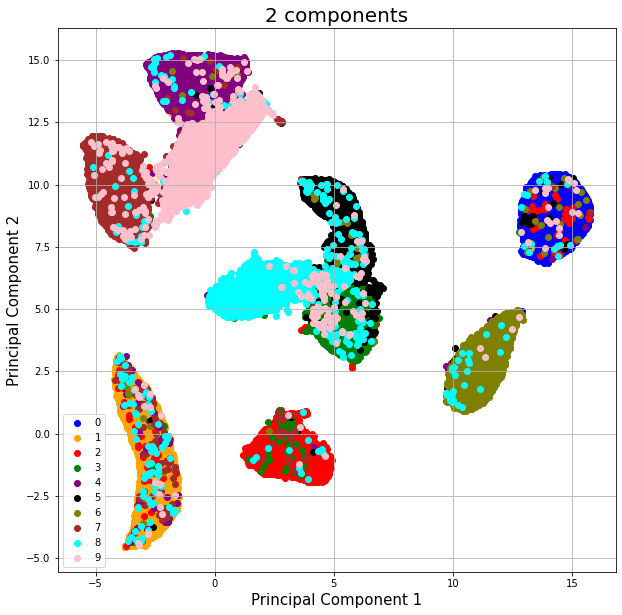

In [19]:
plot_2d_scatter(finalDf, targets, colors)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>
</div>

Con UMAP podemos distinguir mejor que con PCA la distribución de datos según los valores de sus componentes. Por ejemplo, con valores bajos de la primera componente podemos encontrar mayoritariamente los números 1, 7, 9 y 4. Con valores medios los números 8, 5, 3 y 2. Y con valores altos 6 y 0.

También podemos ver cómo hay algunos números que están más cerca que otros. Tenemos el 4, 7 y 9 juntos en la parte superior izquierda y el 8, 5 y 3 en el centro. Esto es muy parecido a lo que habíamos visto con la reducción realizada con PCA, son números que se parecen más, por tanto, tendrán características similares.

Cabe destacar también que se observan ciertos números lejos de dónde están la mayoría de los datos de su clase. Podrían ser números que por el modo en que están creados cuestan más de distinguir y son muy parecidos a otros números.

<div class="alert alert-block alert-info">
Al igual que anteriormente con PCA, calculamos el máximo y mínimo para cada una de las dos dimensiones e invertimos la transformación con el modelo aprendido por UMAP para cada uno de los 100 puntos y visualiza su imagen asociada en una matriz de 10 x 10 imágenes.
</div>

Calculamos el máximo y mínimo de cada componente:

In [20]:
max1 = max(finalDf['principal component 1'])
min1 = min(finalDf['principal component 1'])

max2 = max(finalDf['principal component 2'])
min2 = min(finalDf['principal component 2'])

Calculamos y comprobamos los intervalos:

In [21]:
interval1 = np.linspace(start=max1, stop=min1, num=10)
interval1

array([15.7673111 , 13.40096611, 11.03462113,  8.66827615,  6.30193117,
        3.93558619,  1.56924121, -0.79710378, -3.16344876, -5.52979374])

In [22]:
interval2 = np.linspace(start=max2, stop=min2, num=10)
interval2

array([15.28329468, 13.07900302, 10.87471135,  8.67041969,  6.46612803,
        4.26183637,  2.05754471, -0.14674695, -2.35103861, -4.55533028])

Pasaremos ahora a realizar la transformación y visualizar las imágenes.

Siguiendo el consejo de tener en cuenta el coste computacional de realizar esta inversa, calcularemos primero las combinaciones de las dos arrays con los intervalos que hemos creado y aplicaremos la transformación al resultado.

Para realizar la unión de las dos arrays y obtener las 100 combinaciones posibles hemos utilizado la función *meshgrid()* de NumPy.

In [23]:
mesh = np.array(np.meshgrid(interval1, interval2))
combinations = mesh.T.reshape(-1, 2)

# Comprobamos que se ha realizado correctamente:
print(len(combinations))
combinations[0:10]

100


array([[15.7673111 , 15.28329468],
       [15.7673111 , 13.07900302],
       [15.7673111 , 10.87471135],
       [15.7673111 ,  8.67041969],
       [15.7673111 ,  6.46612803],
       [15.7673111 ,  4.26183637],
       [15.7673111 ,  2.05754471],
       [15.7673111 , -0.14674695],
       [15.7673111 , -2.35103861],
       [15.7673111 , -4.55533028]])

Invertimos la dimensionalidad y obtenemos el original:

In [24]:
inv_transformed_points = reducer.inverse_transform(combinations)

# Comprobamos que tenemos 100 imágenes
len(inv_transformed_points)

100

Adaptamos el bucle que ya hemos utilizado anteriormente y visualizamos las imágenes:

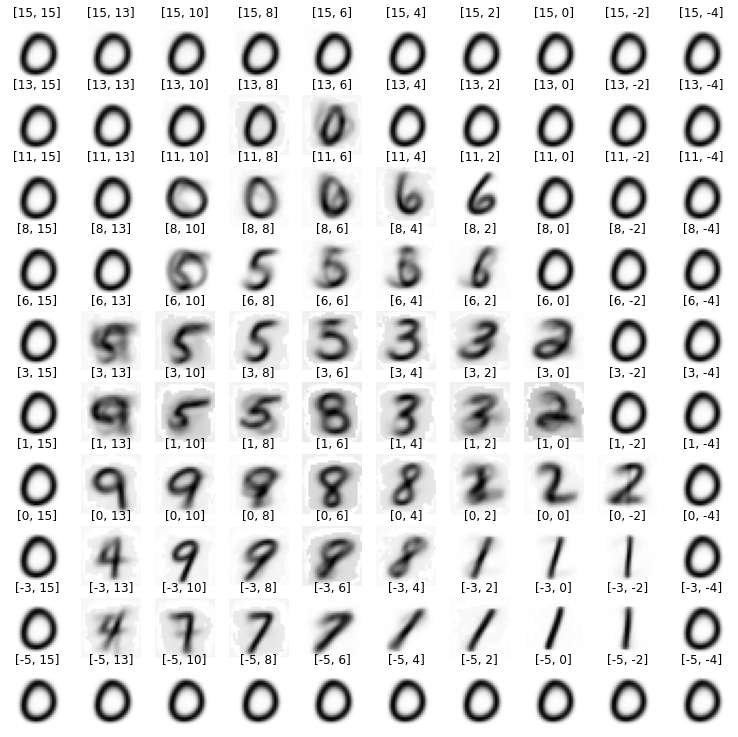

In [25]:
fig, axis = plt.subplots(10, 10, figsize=(13, 13))
for i in range(10):
    for j in range(10):
        axis[i,j].imshow(inv_transformed_points[i*10 + j].reshape(28, 28), cmap='gray_r')
        axis[i,j].set_title([int(interval1[i]), int(interval2[j])])
        axis[i,j].axis('off')

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>
</div>

Reproduciendo los datos a partir de la reducción realizada con UMAP, nos da unas imágenes de los números más claras. Esto podría verificar lo que hemos visto en el gráfico de los componentes. Con UMAP las distintas clases a las que podían pertenecer los datos estaban mejor separadas que en el gráfico de PCA.

En cuanto a las transiciones, podemos ver algunas bastante claras como la que va del valor [-3,10] a [-3,-2] que muestra el valor 7 al inicio y el 1 al final. Son dos números que se asemejan bastante, no resulta extraño ver cómo variando uno de los dos componentes vamos de uno a otro. También podemos ver valores como el 4 y el 9 cercanos o el 7 y 9 o el 3, 8 y 5. Ya habíamos visto en el gráfico de dos dimensiones cómo todos estos números estaban cercanos en los valores de sus componentes.

### Conclusiones

En este punto hemos visto 2 métodos para aplicar reducción a la dimensionalidad:

- PCA
- UMAP

Hemos aplicado PCA y UMAP al conjunto de datos MNIST para proyectarlos en dos dimensiones, reduciendo esto el coste computacional para poder realizar los cálculos que nos interesan. Después hemos visto cómo a partir de los datos reducidos podemos invertir la transformación y obtener los datos en el conjunto de dimensiones originales. Finalmente hemos tomado unos rangos determinados de valores dentro del intervalo de cada componente y hemos analizado qué números se crean a partir de estos datos y cómo se representan.